# 9. Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST.

In [1]:
# Loading in the MNIST data

## Getting the data from sklearn datasets
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


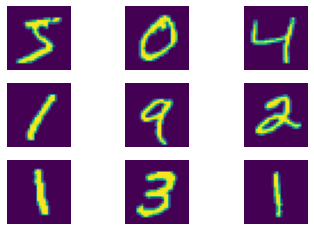

In [2]:
# Plotting 3x3 grid of images

## Import
import matplotlib.pyplot as plt

## Getting the 9 images to view
images = X[:9]

## Creating a figure object
fig = plt.figure()

## Looping through each image and plotting it
for idx, img in enumerate(images):
  
  ### Reshaping the image to have an image dimension
  img = img.reshape(28,28)

  ### Creating a graph for the image
  ax = fig.add_subplot(3,3,idx+1)

  ### Turning off the axes 
  ax.axis('off')

  ### Plotting the image
  ax.imshow(img)

In [3]:
# Preprocess the features

## Imports
import numpy as np

## Scaling the features 
X = X/255.

## Reshaping X to resemble an image
X_reshaped = X.reshape(X.shape[0], 28, 28, 1)

## Viewing the shape of the new X
X_reshaped.shape

(70000, 28, 28, 1)

In [4]:
# Changing the type of target from string to int

y_new = y.astype(int)

In [5]:
# Splitting data into train and validation

## Import
from sklearn.model_selection import train_test_split

## Splitting all data into training/validation and test
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_reshaped, y_new, test_size=.1, random_state=0)

## Splitting training/validation data into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=.15, random_state=0)

## Printing the dimensions to see if it was split correctly
print(f"Shape of training set: {X_train.shape, y_train.shape}")
print(f"Shape of validation set: {X_valid.shape, y_valid.shape}")
print(f"Shape of test set: {X_test.shape, y_test.shape}")
print(f"Total observations: {X_train.shape[0]+X_valid.shape[0]+X_test.shape[0]}")

Shape of training set: ((53550, 28, 28, 1), (53550,))
Shape of validation set: ((9450, 28, 28, 1), (9450,))
Shape of test set: ((7000, 28, 28, 1), (7000,))
Total observations: 70000


In [6]:
# Importing NN layers

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [7]:
# Creating the Sequential model

## Imports
from tensorflow import keras

## Clearing the backend
keras.backend.clear_session()

## Creating the Sequential model
model = Sequential([
    
    ## First layer: CNN 1
    Conv2D(filters=64, kernel_size=7, input_shape=[28,28,1], activation='relu'),
    MaxPool2D(2),

    ## Second layer: CNN 2
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPool2D(2),

    ## Third layer: CNN 2
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    MaxPool2D(2),

    ## Fourth layer: Dense 1
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),

    ## Adding output
    Dense(10, activation='softmax')
])

## Viewing the model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [8]:
# Compiling the model

model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']  
)

In [9]:
# Creating an early stopping callback

early_stopping = keras.callbacks.EarlyStopping(patience=3)

In [10]:
# Training the model

model.fit(
  X_train, 
  y_train, 
  epochs=50, 
  validation_data=(X_valid, y_valid),
  callbacks=[early_stopping]
)

Epoch 1/50
1674/1674 [==============================] - 9s 4ms/step - loss: 0.1617 - accuracy: 0.9503 - val_loss: 0.0508 - val_accuracy: 0.9848
Epoch 2/50
1674/1674 [==============================] - 6s 4ms/step - loss: 0.0481 - accuracy: 0.9855 - val_loss: 0.0676 - val_accuracy: 0.9823
Epoch 3/50
1674/1674 [==============================] - 6s 4ms/step - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.0420 - val_accuracy: 0.9865
Epoch 4/50
1674/1674 [==============================] - 6s 4ms/step - loss: 0.0278 - accuracy: 0.9919 - val_loss: 0.0435 - val_accuracy: 0.9879
Epoch 5/50
1674/1674 [==============================] - 6s 4ms/step - loss: 0.0225 - accuracy: 0.9934 - val_loss: 0.0448 - val_accuracy: 0.9872
Epoch 6/50
1674/1674 [==============================] - 6s 4ms/step - loss: 0.0191 - accuracy: 0.9945 - val_loss: 0.0487 - val_accuracy: 0.9877


In [11]:
# Using the model to predict on the test set

preds = model.predict(X_test)

In [12]:
# Calculating the accuracy

sum(np.argmax(preds, axis=1) == y_test)/X_test.shape[0]

0.991